In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [3]:
df = pd.read_csv("Google_Stock_Price_Train.csv")
data = df['Close'].str.replace(',', '').astype(float).values.reshape(-1, 1)

In [4]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [5]:
X_train, y_train = [], []
for i in range(60, len(scaled_data)):
    X_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=25, batch_size=32)


Epoch 1/25
38/38 [==============================] - 3s 28ms/step - loss: 0.0186
Epoch 2/25
38/38 [==============================] - 1s 28ms/step - loss: 0.0061
Epoch 3/25
38/38 [==============================] - 1s 30ms/step - loss: 0.0053
Epoch 4/25
38/38 [==============================] - 1s 30ms/step - loss: 0.0047
Epoch 5/25
38/38 [==============================] - 1s 30ms/step - loss: 0.0045
Epoch 6/25
38/38 [==============================] - 1s 30ms/step - loss: 0.0045
Epoch 7/25
38/38 [==============================] - 1s 31ms/step - loss: 0.0040
Epoch 8/25
38/38 [==============================] - 1s 30ms/step - loss: 0.0037
Epoch 9/25
38/38 [==============================] - 1s 31ms/step - loss: 0.0035
Epoch 10/25
38/38 [==============================] - 1s 30ms/step - loss: 0.0035
Epoch 11/25
38/38 [==============================] - 1s 30ms/step - loss: 0.0031
Epoch 12/25
38/38 [==============================] - 1s 30ms/step - loss: 0.0037
Epoch 13/25
38/38 [==================

In [7]:
predicted = model.predict(X_train)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_train.reshape(-1, 1))

38/38 [==============================] - 1s 7ms/step


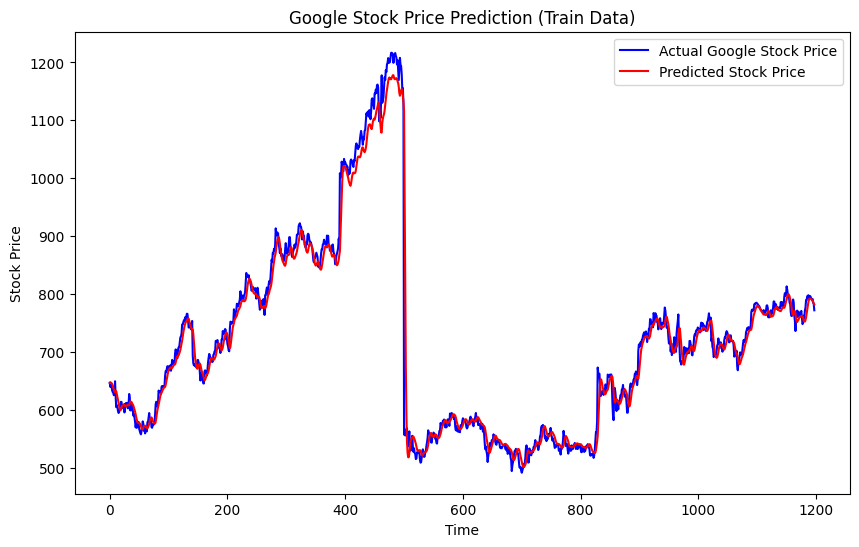

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(real_prices, color='blue', label='Actual Google Stock Price')
plt.plot(predicted_prices, color='red', label='Predicted Stock Price')
plt.title('Google Stock Price Prediction (Train Data)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Metrics
mse = mean_squared_error(real_prices, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real_prices, predicted_prices)
r2 = r2_score(real_prices, predicted_prices)

print(f"Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

Evaluation Metrics:
Mean Squared Error (MSE): 787.29
Root Mean Squared Error (RMSE): 28.06
Mean Absolute Error (MAE): 14.20
R² Score: 0.9718
